In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/DataSet/cleaned_DataScientist.csv'
df = pd.read_csv(file_path)

# Preview Job Description column
df['Job Description'].head(5)

Mounted at /content/drive


,Job Description
0,"about hopper at hopper, were on a mission to m..."
1,"at noom, we use scientifically proven methods ..."
2,decode_m httpswww.decode-m.com data science ma...
3,sapphire digital seeks a dynamic and driven mi...
4,"director, data science - 200537 description ed..."


In [3]:
# Step 1: Clean & Tokenize Job Descriptions

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Prepare stopwords
stop_words = set(stopwords.words('english'))

# Define text cleaning function
def clean_text(text):
    text = str(text).lower()    # Lowercase
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)     # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)     # Remove special chars & numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]     # Remove stopwords
    return tokens

# Apply to Job Description column
df['clean_tokens'] = df['Job Description'].apply(clean_text)

# Preview result
df[['Job Description', 'clean_tokens']].head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Job Description,clean_tokens
0,"about hopper at hopper, were on a mission to m...","[hopper, hopper, mission, make, booking, trave..."
1,"at noom, we use scientifically proven methods ...","[noom, use, scientifically, proven, methods, h..."
2,decode_m httpswww.decode-m.com data science ma...,"[decodem, https, data, science, manager, job, ..."


In [6]:
# Step 2: Extract Common Skills

# Define a basic set of technical and soft skills
technical_skills = [
    'python', 'sql', 'excel', 'tableau', 'powerbi', 'spark',
    'pandas', 'numpy', 'matplotlib', 'seaborn',
    'hadoop', 'aws', 'azure', 'gcp', 'docker',
    'tensorflow', 'keras', 'pytorch', 'scikit', 'machine', 'learning',
    'nlp', 'data', 'analysis', 'analytics', 'modeling', 'statistics'
]

soft_skills = [
    'communication', 'leadership', 'teamwork', 'problem', 'solving',
    'collaboration', 'adaptability', 'critical', 'thinking', 'creativity'
]

In [8]:
# Function to extract skills from token list
def extract_skills(tokens, skill_list):
    return [word for word in tokens if word in skill_list]

# Apply skill matching
df['Technical Skills'] = df['clean_tokens'].apply(lambda x: extract_skills(x, technical_skills))
df['Soft Skills'] = df['clean_tokens'].apply(lambda x: extract_skills(x, soft_skills))

# Preview result
df[['Technical Skills', 'Soft Skills']].head(5)

,Technical Skills,Soft Skills
0,"[data, machine, learning, data, data, machine,...",[]
1,"[data, data, data, analysis, machine, learning...","[solving, communication]"
2,"[data, data, data, data, analytics, data, stat...",[leadership]
3,"[data, analysis, data, data, data, data, data,...",[communication]
4,"[data, data, analytics, data, machine, learnin...","[leadership, communication]"


In [9]:
# Step 3: Visualize Common Skills

!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

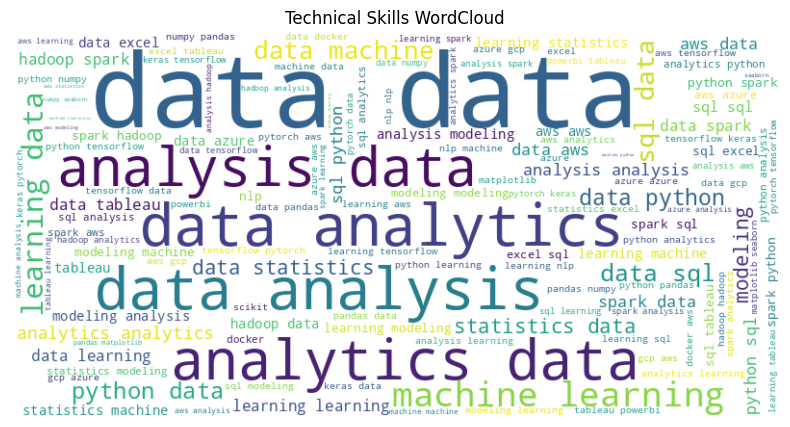

In [10]:
# Flatten technical skills into a single list
all_tech_skills = [skill for sublist in df['technical_skills'] for skill in sublist]

# Convert to string for wordcloud
text = ' '.join(all_tech_skills)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Technical Skills WordCloud')
plt.show()

/tmp/ipython-input-1711013796.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skills_df, x='Count', y='Skill', palette='viridis')


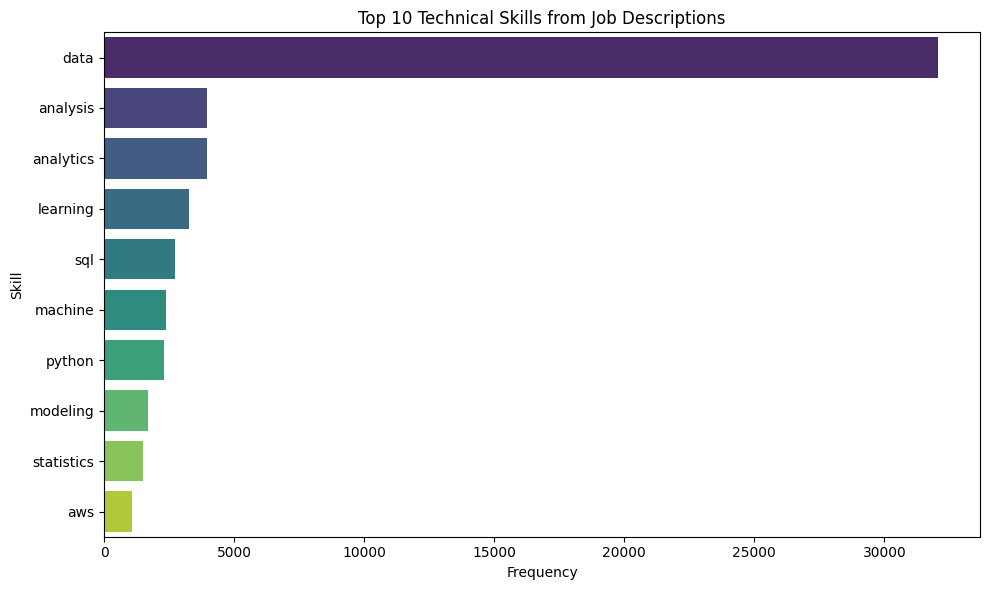

In [11]:
from collections import Counter
import seaborn as sns

# Count technical skills
skill_counts = Counter(all_tech_skills)
top_skills = skill_counts.most_common(10)
skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=skills_df, x='Count', y='Skill', palette='viridis')
plt.title('Top 10 Technical Skills from Job Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

##  Day 6: Skill Extraction (Text Mining)

**Dataset Used:** `cleaned_DataScientist.csv`

---

###  Objective:
To extract and visualize common technical and soft skills required in data-related job roles using NLP and keyword matching techniques.

---

###  Steps Performed:

1. **Loaded Cleaned Dataset**
   - Accessed from Google Drive
   - Focused on the `Job Description` column

2. **Cleaned and Tokenized Text**
   - Lowercased all text
   - Removed URLs, punctuation, numbers, and stopwords using `nltk`
   - Generated `clean_tokens` column for each job description

3. **Defined Skill Dictionaries**
   - Created two lists:
     - `technical_skills`: Python, SQL, AWS, ML, etc.
     - `soft_skills`: communication, teamwork, leadership, etc.

4. **Extracted Skills using Keyword Matching**
   - Matched tokens to skill lists using custom functions
   - Created new columns:
     - `technical_skills`
     - `soft_skills`

5. **Visualized Most Common Skills**
   -  **WordCloud** for top technical skills
   -  **Bar Chart** of top 10 technical skills using `seaborn`

---

### Key Findings:
- Frequent technical skills: `data`, `machine`, `learning`, `python`, `sql`, `analysis`
- Common soft skills include: `communication`, `leadership`, and `problem-solving`
- Skill mentions are often repeated in job descriptions (emphasizing importance)

---
